# Kickstarter trends

## k-means & Clustering visualizations


In [12]:
# Makes matplotlib plots work better with Jupyter
%matplotlib inline

# Import the necessary libraries. 
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [13]:
# Import data

file = "kickstarter_data_full.csv"

data = pd.read_csv(file, sep=",", low_memory=False)

## Understanding the Data 
column_a
id
photo
name
blurb
goal
pledged
state
slug
disable_communication
country
currency
currency_symbol
currency_trailing_code
deadline
state_changed_at
created_at
launched_at
staff_pick
backers_count
static_usd_rate
usd_pledged
creator
location
category
profile
spotlight
urls
source_url
friends
is_starred
is_backing
permissions
name_len
name_len_clean
blurb_len
blurb_len_clean
deadline_weekday
state_changed_at_weekday
created_at_weekday
launched_at_weekday
deadline_month
deadline_day
deadline_yr
deadline_hr
state_changed_at_month
state_changed_at_day
state_changed_at_yr
state_changed_at_hr
created_at_month

In [14]:
data

,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0
5,5,808486483,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Shadow School Board - Reforming Texas School B...,Shadow School Board will provide parents & tax...,13000.0,1136.0,failed,shadow-school-board-reforming-texas-school-boards,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,2,30,30,0,1,1,0,0
6,6,883246296,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Research in HIV prevention, treatment, and aid",I want to create an organization that is compo...,50000.0,0.0,failed,research-in-hiv-prevention-treatment-and-aid,False,...,30 days 00:00:00.000000000,30 days 00:00:03.000000000,0,30,30,0,1,1,0,0
7,7,242834615,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Cardinal Investment Club,Group of passionate and eager students gaining...,10000.0,0.0,failed,cardinal-investment-club,False,...,45 days 00:00:00.000000000,45 days 00:00:01.000000000,0,45,45,0,1,1,0,1
8,8,2079785043,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",V.I.P.-Architecture,"V.I.P.-Architecture shows the most iconic, the...",6000.0,153.0,failed,vip-architecture,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,1,30,30,0,0,0,0,0
9,9,1624645868,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Collected Works of Ross Wells,"A collection of plays, screenplays, and photog...",15000.0,0.0,failed,collected-works-of-ross-wells,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,1,30,30,0,1,1,0,0


### Selecting features
* country:
* pledged:
* goal: 

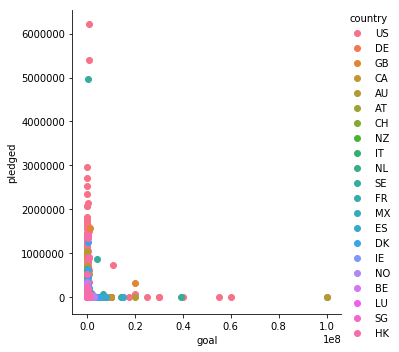

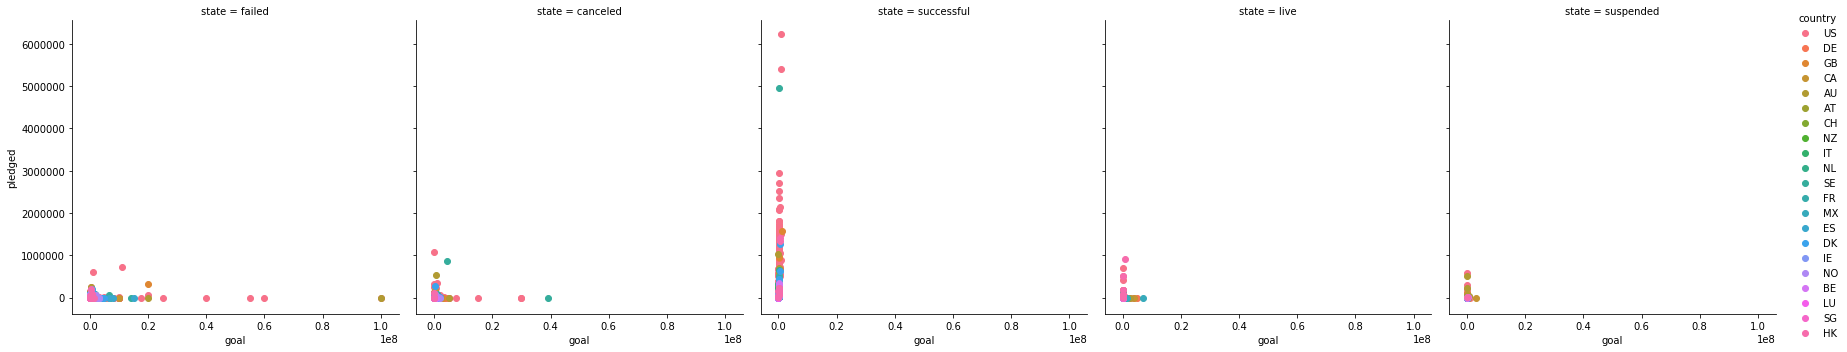

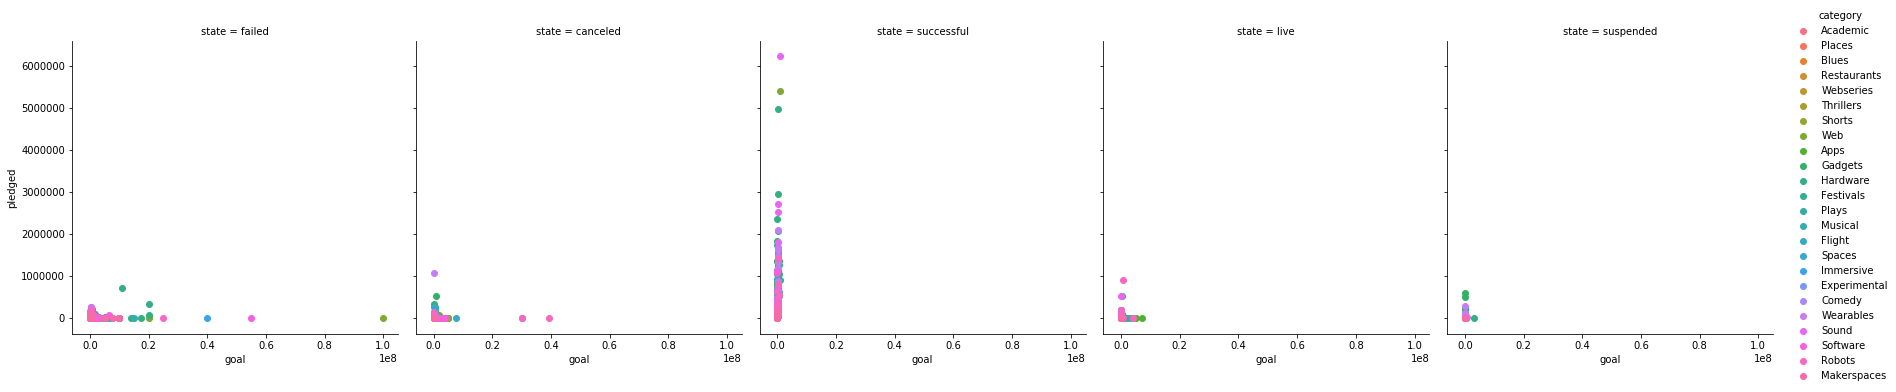

In [15]:
sns.FacetGrid(data, height=5,hue="country").map(plt.scatter,"goal","pledged").add_legend()
sns.FacetGrid(data, height=5,hue="country", col='state').map(plt.scatter,"goal",'pledged').add_legend()
sns.FacetGrid(data, height=5,hue="category", col='state').map(plt.scatter,"goal",'pledged').add_legend()

## choosing features to avoid the curse of dimensionality

In [17]:
all_features = ['column_a', 'id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'disable_communication', 'country', 'currency', 'currency_symbol', 'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate', 'usd_pledged', 'creator', 'location', 'category', 'profile', 'spotlight', 'urls', 'source_url', 'friends', 'is_starred', 'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_month', 'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month', 'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr', 'created_at_month']

features = ['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug', 'country', 'currency', 'deadline', 'created_at', 'launched_at', 'backers_count', 'usd_pledged', 'creator', 'location', 'category', 'profile', 'spotlight', 'urls', 'name_len_clean', 'blurb_len_clean', 'deadline_weekday', 'created_at_weekday', 'launched_at_weekday', 'deadline_month', 'deadline_yr', 'created_at_month']
# cleaning: remove all the lines that contain a NaN in one of the feature columns
data = data.dropna(subset=features)

# K-means

0. pick a value for K (number of clusters)
1. normalize fields 
2. create K random centroids as arrays with size the number of features
3. foreach `datapoint` in `data`:
  1. set as `centroid` of `datapoint` the closest `centroid`
  2. if at least one `centroid` has changed: goto 3
  
### Tips
- the computations needed for k-means are expensive, test on a small subset of the data to save time (5/10 to check calculations on single rows, 50/100 to check the correctness of the whole algorithm)
- you'll need to compute a distance at a certain point, check Lab4
- [DataFrame.idxmin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html]) will give you the index of the smallest entry in a dataset
- `dataFrame1 is dataFrame2` is not correct (it checks if the two objects are the same, not if they contain the same values). The correct approach is `dataFrame1.equals(dataFrame2)` (or `dataFrame1['aColumn'].equals(dataFrame2['aColumn'])` ;))

In [20]:
# 0: define K
K = 5

In [25]:
def k_means_clustering(data, max_iter=-1):
    centroids = pd.DataFrame(np.random.rand(K, len(features)) * 100, columns=features)

    def assign_centroid(x):
        x['Centroid'] = centroids.sub(x[features]).pow(2).sum(1).pow(0.5).idxmin(0)
        return x
    
    data = data.assign(Centroid=pd.Series([-1] * len(data)), OldCentroid=pd.Series([0] * len(data)))
    while not data['Centroid'].equals(data['OldCentroid']):
        data['OldCentroid'] = data['Centroid']
        data = data.apply(assign_centroid, axis=1)
        centroids = data.groupby('Centroid').mean()[features]
        centroids.reset_index()
    
    return data[features+['Centroid']], centroids
    
new_data, new_centroids = k_means_clustering(data.head(100))

TypeError: ("ufunc 'subtract' did not contain a loop with signature matching types dtype('<U1650') dtype('<U1650') dtype('<U1650')", 'occurred at index 0')

In [22]:
new_data, new_centroids = k_means_clustering(data.head(10))

TypeError: ("ufunc 'subtract' did not contain a loop with signature matching types dtype('<U1650') dtype('<U1650') dtype('<U1650')", 'occurred at index 0')

In [24]:
new_data

,disable_communication,currency_symbol,currency_trailing_code,state_changed_at,staff_pick,static_usd_rate,source_url,friends,is_starred,is_backing,...,name_len,blurb_len,state_changed_at_weekday,deadline_day,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr,Centroid
15831,False,$,True,2017-01-10 21:02:00,False,1.000000,https://www.kickstarter.com/discover/categorie...,[],False,False,...,7.0,20.0,Tuesday,24,21,1,10,2017,21,NaN
15832,False,$,True,2017-01-17 17:01:26,False,1.000000,https://www.kickstarter.com/discover/categorie...,[],False,False,...,6.0,19.0,Tuesday,3,17,1,17,2017,17,NaN
15833,False,$,True,2017-02-01 09:45:38,False,0.128895,https://www.kickstarter.com/discover/categorie...,[],False,False,...,6.0,20.0,Wednesday,3,9,2,1,2017,9,NaN
15834,False,kr,True,2017-01-17 12:09:04,False,0.112025,https://www.kickstarter.com/discover/categorie...,[],False,False,...,4.0,17.0,Tuesday,16,12,1,17,2017,12,NaN
15835,False,$,True,2017-02-08 12:03:21,False,1.000000,https://www.kickstarter.com/discover/categorie...,[],False,False,...,9.0,22.0,Wednesday,10,12,2,8,2017,12,NaN
15836,False,£,False,2017-02-13 03:12:33,False,1.248907,https://www.kickstarter.com/discover/categorie...,[],False,False,...,3.0,13.0,Monday,15,3,2,13,2017,3,NaN
15837,False,$,True,2017-01-31 09:45:35,False,1.000000,https://www.kickstarter.com/discover/categorie...,[],False,False,...,9.0,19.0,Tuesday,12,9,1,31,2017,9,NaN
15838,False,$,True,2017-02-15 09:00:58,False,0.049393,https://www.kickstarter.com/discover/categorie...,[],False,False,...,5.0,19.0,Wednesday,16,9,2,15,2017,9,NaN
15839,False,$,True,2017-02-01 09:19:55,False,1.000000,https://www.kickstarter.com/discover/categorie...,[],False,False,...,5.0,15.0,Wednesday,13,9,2,1,2017,9,NaN
15840,False,$,True,2017-01-30 10:21:46,False,1.000000,https://www.kickstarter.com/discover/categorie...,[],False,False,...,8.0,13.0,Monday,1,10,1,30,2017,10,NaN


In [26]:
new_centroids

,disable_communication,currency_symbol,currency_trailing_code,state_changed_at,staff_pick,static_usd_rate,source_url,friends,is_starred,is_backing,permissions,name_len,blurb_len,state_changed_at_weekday,deadline_day,deadline_hr,state_changed_at_month,state_changed_at_day,state_changed_at_yr,state_changed_at_hr
0,25.695187,10.668732,26.487056,12.245695,62.141439,42.244704,42.941273,99.144688,97.576573,74.162337,58.220947,62.626237,7.069003,32.553519,8.191102,6.388677,91.298598,19.333460,25.508260,2.591627
1,36.898218,97.367927,54.263223,73.246812,52.669516,52.722642,53.401957,38.410391,14.040074,85.841733,24.472505,89.903540,62.544602,21.835823,73.651975,10.876056,11.089016,66.097777,23.071353,4.883460
2,46.606188,1.242174,10.845577,66.929894,39.578595,32.790890,62.483137,33.722495,64.013379,94.875942,75.970672,30.911379,54.228897,75.860921,39.032864,4.517756,30.119632,78.605398,23.629086,72.483284
3,41.650354,33.786260,47.379365,17.198716,32.642862,76.847203,60.322526,57.963498,60.528327,6.745983,99.092344,97.556776,29.443962,12.959165,91.794131,66.980261,51.542707,12.400484,4.775534,23.450578
4,90.282805,8.372322,81.674552,12.319361,1.535953,61.435493,14.109359,30.968559,13.148918,0.752397,97.720192,38.442623,47.247076,99.588378,5.066103,73.756193,11.888149,62.917501,94.337579,84.825940


# Clusters visualization
The most difficult task with clustering is understand if the clustering makes sense and what the clustering means. If the dimensionality is low, a good idea is to use a pairplot and see if the clusters are really close in each slice. The closer they are, the better.

KeyError: 'id'

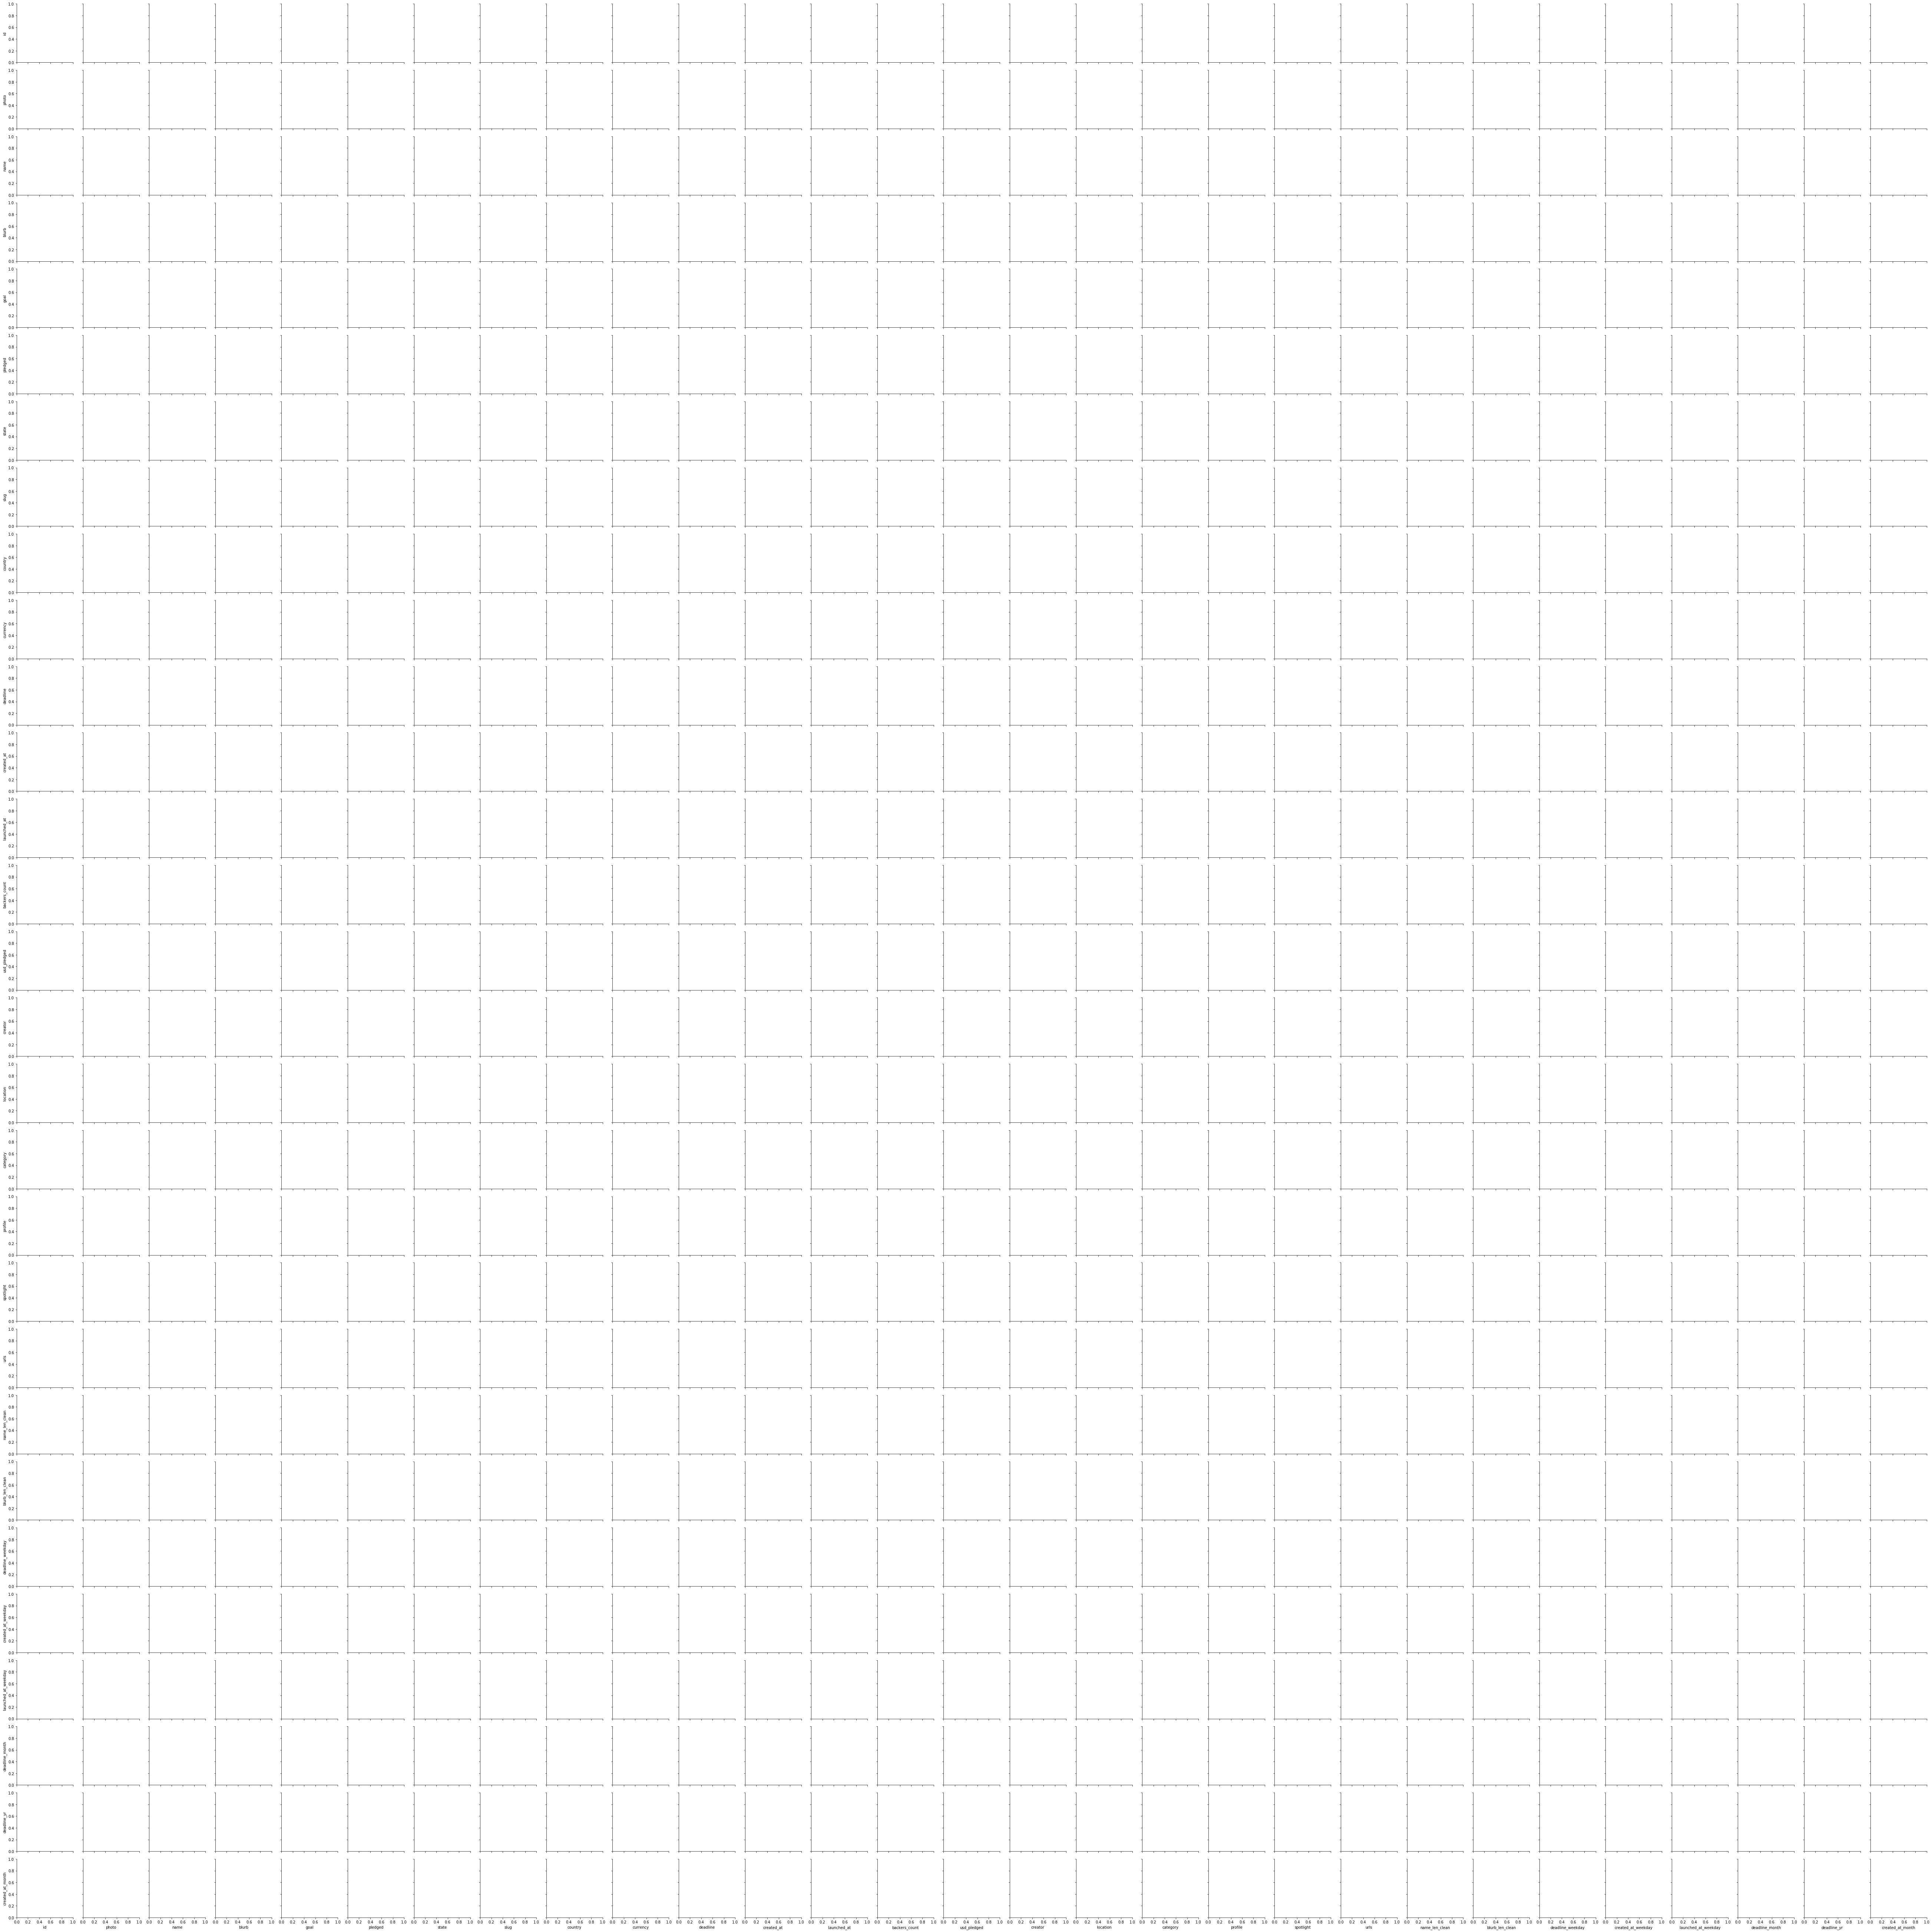

In [27]:
sns.pairplot(new_data, vars=features, hue='Centroid')